# CNN Kullanılarak Kedi - Köpek Sınıflandırması
----------------------------------------
# Dogs vs. Cats (Small) Dataset

# Dataset'i Parçalama

In [1]:
# Dosya okuma ve yazma işlemleri için gerekli kütüphanelerin import edilmesi
import os, shutil

In [2]:
# Base dataset'in ve yeni small dataset'in yolu ve klasörlerin oluşturulması
# train, validation ve test olarak üç grup
# cats ve dogs olmak üzere iki grup
original_dataset_dir = 'C:\\Users\\oguzs\\Downloads\\Dogs_vs_Cats_Dataset\\train'

In [3]:
base_dir = 'C:\\Users\\oguzs\\ColabCodes\\Datasets\\dogs_vs_cats_small'

In [ ]:
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [6]:
# Ana dizinden verilerin yeni dizine parçalanarak aktarılması
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
# Oluşturulan yeni dataset gruplarının boyutları
print('total training cat images: ', len(os.listdir(train_cats_dir)))

total training cat images:  1000


In [7]:
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))

total validation cat images:  500


In [8]:
print('total test cat images: ', len(os.listdir(test_cats_dir)))

total test cat images:  500


In [9]:
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

total training dog images:  1000


In [10]:
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total validation dog images:  500


In [11]:
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total test dog images:  500


# CNN modeli kurma (Ön Eğitimsiz)

In [12]:
# Model için gerekli kütüphanelerin import edilmesi
from keras import layers
from keras import models

Using TensorFlow backend.


In [13]:
# İlk tasarlanan temel model
# (fonksiyonun oluşturulması, çağrılması ve compile edilmesi)
def MyModel():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [14]:
model = MyModel()

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [16]:
# "optimizer"da RMSprop'u kullanabilmek için gerekli kütüphanenin import edilmesi
from keras import optimizers

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

# Veri Önişleme

In [18]:
# Veri Önişleme (preprocessing) için gerekli kütüphanelerin import edilmesi
# (JPG dosların tensor'lere dönüştürülmesi gerekli)
from keras.preprocessing.image import ImageDataGenerator

In [19]:
# RGB kanallarının 0-1 arasına normalize edilmesi
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Eğitim için gerekli olan train ve validation veri üreteçlerinin (data generator) oluşturulması
# (boyutlar (150, 150), her seferinde 20'li gruplarla ve binary kategorize edilmiş bir şekilde)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [21]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [22]:
# Üreteçlerin çıktılarının gösterimi
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


# Eğitme ve Başarımı Değerlendirme

In [23]:
# modelin eğitilmesi
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6901 - acc: 0.5305 - val_loss: 0.6835 - val_acc: 0.6240
Epoch 2/30
100/100 [==============================] - 5s 46ms/step - loss: 0.6532 - acc: 0.6050 - val_loss: 0.6139 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5980 - acc: 0.6775 - val_loss: 0.5498 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5676 - acc: 0.7055 - val_loss: 0.7503 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5377 - acc: 0.7240 - val_loss: 0.6802 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5027 - acc: 0.7535 - val_loss: 0.5860 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 5s 46ms/step - loss: 0.4802 - acc: 0.7705 - val_loss: 0.4026 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 5s 46ms/step - 

In [25]:
# Eğitimi görselleştirmek için gerekli kütüphanenin import edilmesi
import matplotlib.pyplot as plt

In [26]:
# Başarım ve Kayıp grafiklerini çizdiren fonksiyon
def showAccAndLoss(arg_history):
    
    acc = arg_history.history['acc']
    val_acc = arg_history.history['val_acc']
    loss = arg_history.history['loss']
    val_loss = arg_history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Eğitim Başarımı')
    plt.plot(epochs, val_acc, 'b', label='Doğrulama Başarımı')
    plt.title('Eğitim ve Doğrulama Başarımı')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Eğitim Kaybı')
    plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
    plt.title('Eğitim ve Doğrulama Kaybı')
    plt.legend()
    
    plt.show()

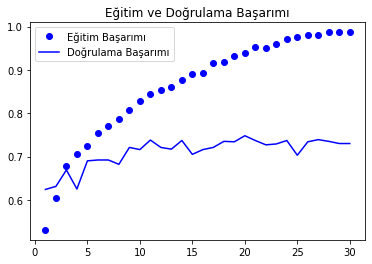

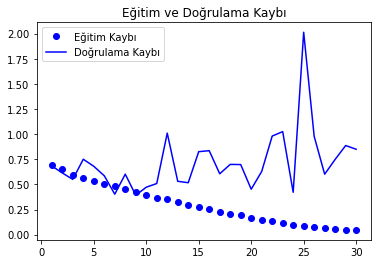

In [27]:
# Grafiklerin çizdirilmesi
showAccAndLoss(history)

# Part-2: Dataset Çeşitlendirme

In [28]:
# Az veri sorununu çözmek için verisetinde çeşitlendirmeye gidilmesi
# 
# Modelin güncellenmesi
# (Çeşitlendirmeden kaynaklanacak overfitting'i kırmak için Dropout katmanının eklenmesi)
def MyModel2():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [29]:
# train datasetinin çeşitlendirilmesi için gerekli transform parametrelerinin eklenmesi 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [30]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [32]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [33]:
model = MyModel2()

In [34]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

# Eğitme ve Başarımı Değerlendirme 2

In [35]:
# Yeni modelin eğitilmesi
# (epoch sayısı 100'e çıkarıldı)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6918 - acc: 0.5180 - val_loss: 0.6808 - val_acc: 0.5799
Epoch 2/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6812 - acc: 0.5631 - val_loss: 0.6552 - val_acc: 0.5812
Epoch 3/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6633 - acc: 0.5953 - val_loss: 0.6798 - val_acc: 0.6047
Epoch 4/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6618 - acc: 0.5970 - val_loss: 0.5626 - val_acc: 0.6501
Epoch 5/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6404 - acc: 0.6348 - val_loss: 0.6005 - val_acc: 0.6421
Epoch 6/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6204 - acc: 0.6512 - val_loss: 0.7358 - val_acc: 0.6649
Epoch 7/100
100/100 [==============================] - 16s 157ms/step - loss: 0.6034 - acc: 0.6737 - val_loss: 0.6656 - val_acc: 0.6688
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 16s 164ms/step - loss: 0.4076 - acc: 0.8106 - val_loss: 0.4552 - val_acc: 0.8041
Epoch 62/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4168 - acc: 0.8068 - val_loss: 0.4953 - val_acc: 0.7766
Epoch 63/100
100/100 [==============================] - 17s 168ms/step - loss: 0.4103 - acc: 0.8087 - val_loss: 0.5151 - val_acc: 0.8054
Epoch 64/100
100/100 [==============================] - 16s 164ms/step - loss: 0.3962 - acc: 0.8179 - val_loss: 0.7469 - val_acc: 0.7880
Epoch 65/100
100/100 [==============================] - 16s 163ms/step - loss: 0.3999 - acc: 0.8147 - val_loss: 0.2648 - val_acc: 0.7951
Epoch 66/100
100/100 [==============================] - 16s 164ms/step - loss: 0.3949 - acc: 0.8223 - val_loss: 0.4482 - val_acc: 0.8189
Epoch 67/100
100/100 [==============================] - 16s 164ms/step - loss: 0.3899 - acc: 0.8282 - val_loss: 0.4947 - val_acc: 0.7532
Epoch 68/100
100/100 [===================

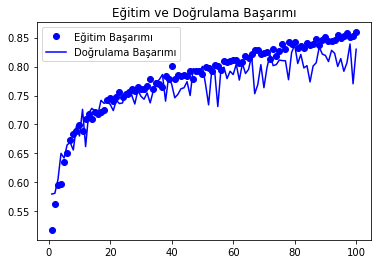

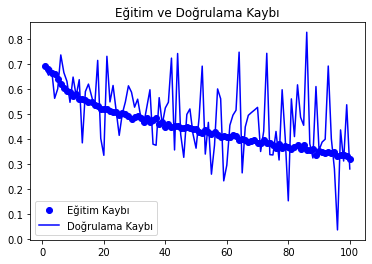

In [36]:
showAccAndLoss(history)

# Öneğitimli CNN modellerinin Kullanımı

In [38]:
# Kullanılacak VGG16 modeli için gerekli kütüphanenin import edilmesi,
# "imagenet"teki ağırlıklara göre oluşturulması ve modelin incelemesi
from keras.applications import VGG16

In [39]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 9s 0us/step


In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Hızlı Yöntem - Dataset Çeşitlendirme Olmadan Öznitelik Çıkarımı

In [41]:
# Numpy array'leri ile çalışabilmek için gerekli kütüphanelerin import edilmesi
import numpy as np

In [42]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [43]:
# VGG16 modelini kullanarak öznitelik çıkarımı yapan fonksiyon
# (Verilen dizinden istediğin uzunlukta)
def extract_features(directory, sample_count):
    
    features = np.zeros(shape=(sample_count, 4 , 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i=0
    
    for inputs_batch, labels_batch in generator:
        
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
        i += 1
        
        if i * batch_size >= sample_count:
            break
    
    return features, labels

In [44]:
# train, validation ve test verilerinin öznitelik çıkarımının yapılması ve Flatten işleminin uygulanması
train_features, train_labels = extract_features(train_dir, 2000)

Found 2000 images belonging to 2 classes.


In [45]:
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 1000 images belonging to 2 classes.


In [46]:
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.


In [47]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))

In [48]:
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

In [49]:
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [50]:
# VGG16'den geçen verilerin eğitileceği model
def MyModel3():
    model = models.Sequential()
    
    model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [51]:
model = MyModel3()

In [52]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

# Eğitme ve Başarımı Değerlendirme 3

In [53]:
# Dataset çeşitlendirmesiz VGG16'lı model'in eğitilmesi
history = model.fit(
    train_features,
    train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 404us/step - loss: 0.6012 - acc: 0.6705 - val_loss: 0.4337 - val_acc: 0.8450
Epoch 2/30
2000/2000 [==============================] - 0s 235us/step - loss: 0.4203 - acc: 0.8035 - val_loss: 0.3506 - val_acc: 0.8660
Epoch 3/30
2000/2000 [==============================] - 0s 241us/step - loss: 0.3502 - acc: 0.8455 - val_loss: 0.3143 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 0s 244us/step - loss: 0.3070 - acc: 0.8735 - val_loss: 0.2947 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 255us/step - loss: 0.2772 - acc: 0.8920 - val_loss: 0.2878 - val_acc: 0.8820
Epoch 6/30
2000/2000 [==============================] - 0s 225us/step - loss: 0.2570 - acc: 0.8955 - val_loss: 0.2866 - val_acc: 0.8760
Epoch 7/30
2000/2000 [==============================] - 0s 235us/step - loss: 0.2406 - acc: 0.9055 - val_loss: 0.2601 - val_acc: 0.8960


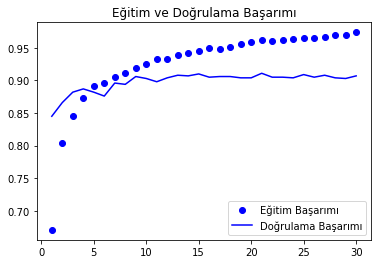

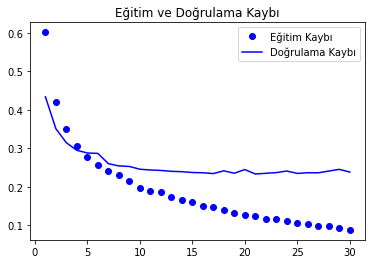

In [54]:
showAccAndLoss(history)

# Maliyetli Yöntem - Dataset Çeşitlendirerek Öznitelik Çıkarımı

In [55]:
# conv_base'in (VGG16) direk ekli olduğu yeni model
def MyModel4():
    model = models.Sequential()
    
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [56]:
model = MyModel4()

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Eğitim sırasında conv_base'in ağırlıklarının bozulmaması için trainable'ın dondurulması
print('conv_base dondurulmadan önce öğrenen ağırlık sayısı: ', len(model.trainable_weights))

conv_base dondurulmadan önce öğrenen ağırlık sayısı:  30


In [59]:
conv_base.trainable = False

In [60]:
print('conv_base dondurulduktan sonra öğrenen ağırlık sayısı: ', len(model.trainable_weights))

conv_base dondurulduktan sonra öğrenen ağırlık sayısı:  4


In [61]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [62]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [74]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [64]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [65]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

# Eğitme ve Başarımı Değerlendirme 4 - 1

In [66]:
# Model ilk önce eğitimden geçirilerek eğitimsiz katmanların ağırlıklarının oluşması (30 epoch)
# (Daha sonra hassas ayar yapılacak...)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 21s 210ms/step - loss: 0.5807 - acc: 0.7115 - val_loss: 0.5568 - val_acc: 0.7930
Epoch 2/30
100/100 [==============================] - 14s 136ms/step - loss: 0.4797 - acc: 0.7925 - val_loss: 0.4615 - val_acc: 0.8540
Epoch 3/30
100/100 [==============================] - 14s 136ms/step - loss: 0.4224 - acc: 0.8120 - val_loss: 0.3761 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 14s 137ms/step - loss: 0.3966 - acc: 0.8280 - val_loss: 0.3271 - val_acc: 0.8540
Epoch 5/30
100/100 [==============================] - 14s 137ms/step - loss: 0.3744 - acc: 0.8400 - val_loss: 0.2394 - val_acc: 0.8880
Epoch 6/30
100/100 [==============================] - 14s 137ms/step - loss: 0.3511 - acc: 0.8495 - val_loss: 0.3397 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 14s 137ms/step - loss: 0.3643 - acc: 0.8410 - val_loss: 0.5374 - val_acc: 0.8820
Epoch 8/30
100/100 [==============================] - 1

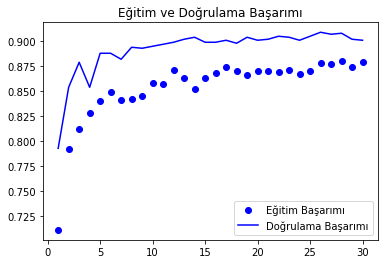

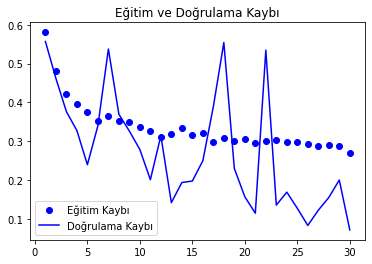

In [67]:
showAccAndLoss(history)

# Model'e Hassas Ayar Yapımı

In [68]:
# conv_base'te, dataset'e özgü niteliklerin özelleşmesi için en üst katmanların
# trainable'ının aktif hale getirilmesi (hassas ayar)
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [69]:
# Güncellenen model'in tekrar compile edilmesi
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

# Eğitme ve Başarımı Değerlendirme 4 - 2

In [70]:
# Hassay ayar yapılmış dataset çeşitlendirmeli VGG16'lı modelin eğitilmesi (100 epoch)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 17s 165ms/step - loss: 0.2894 - acc: 0.8715 - val_loss: 0.1327 - val_acc: 0.9040
Epoch 2/100
100/100 [==============================] - 16s 159ms/step - loss: 0.2694 - acc: 0.8820 - val_loss: 0.2223 - val_acc: 0.9160
Epoch 3/100
100/100 [==============================] - 16s 160ms/step - loss: 0.2443 - acc: 0.8870 - val_loss: 0.1474 - val_acc: 0.9120
Epoch 4/100
100/100 [==============================] - 16s 160ms/step - loss: 0.2377 - acc: 0.9020 - val_loss: 0.1399 - val_acc: 0.9290
Epoch 5/100
100/100 [==============================] - 16s 160ms/step - loss: 0.2085 - acc: 0.9145 - val_loss: 0.2018 - val_acc: 0.9310
Epoch 6/100
100/100 [==============================] - 16s 160ms/step - loss: 0.1918 - acc: 0.9290 - val_loss: 0.4210 - val_acc: 0.9170
Epoch 7/100
100/100 [==============================] - 16s 160ms/step - loss: 0.1702 - acc: 0.9285 - val_loss: 0.1311 - val_acc: 0.9270
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0345 - acc: 0.9860 - val_loss: 0.2587 - val_acc: 0.9350
Epoch 62/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0285 - acc: 0.9910 - val_loss: 0.0143 - val_acc: 0.9350
Epoch 63/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0293 - acc: 0.9890 - val_loss: 0.0535 - val_acc: 0.9410
Epoch 64/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0269 - acc: 0.9910 - val_loss: 0.2778 - val_acc: 0.9400
Epoch 65/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0268 - acc: 0.9895 - val_loss: 0.0094 - val_acc: 0.9360
Epoch 66/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0324 - acc: 0.9895 - val_loss: 0.0116 - val_acc: 0.9420
Epoch 67/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0359 - acc: 0.9885 - val_loss: 0.3723 - val_acc: 0.9370
Epoch 68/100
100/100 [===================

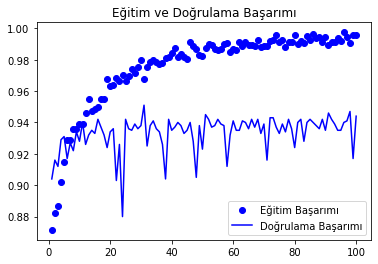

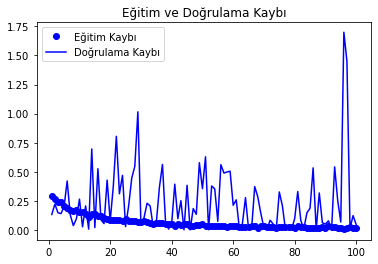

In [71]:
showAccAndLoss(history)

In [73]:
# Model başarımının test verisiyle ölçümü
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [75]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

In [76]:
print('test acc: ', test_acc)

test acc:  0.9390000104904175
